### Imports

In [15]:
from keras_segmentation.models.segnet import vgg_segnet
from matplotlib import pyplot as plt
import tensorflow as tf
from imgaug import augmenters as iaa
import os
from PIL import Image
from glob import glob
import skimage.transform as st
import matplotlib.image as mpimg
from keras.callbacks import History

### Model Initialization

In [16]:
model = vgg_segnet(n_classes=2 ,  input_height=256, input_width=256)

### Augmentation

In [83]:
def custom_augmentation():
    return  iaa.Sequential(
        [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5),  # horizontally flip 50% of all images
            iaa.Flipud(0.5), # horizontally flip 50% of all images
        ])


### Model Training

In [20]:
history = History()

train = model.train(
    train_images = "dataset-segmentation/train-resized/",
    train_annotations = "dataset-segmentation/train-annotations/",
    validate=True,
    val_images="dataset-segmentation/validate-resized/",
    val_annotations="dataset-segmentation/validate-annotations/",
    checkpoints_path = "tmp/checkpoints/vgg_segnet_1", 
    epochs=10, 
    do_augment=True, # enable augmentation 
    custom_augmentation=custom_augmentation, # sets the augmention function to use
    callbacks = [history]
)

Verifying training dataset


100%|██████████| 240/240 [00:05<00:00, 45.07it/s] 


Dataset verified! 
Verifying validation dataset


100%|██████████| 30/30 [00:00<00:00, 87.87it/s] 


Dataset verified! 
Epoch 1/10
512/512 [==============================] - 77s 146ms/step - loss: 0.1911 - accuracy: 0.9276 - val_loss: 0.0961 - val_accuracy: 0.9610
Epoch 2/10
512/512 [==============================] - 67s 130ms/step - loss: 0.1181 - accuracy: 0.9541 - val_loss: 0.2955 - val_accuracy: 0.8772
Epoch 3/10
512/512 [==============================] - 72s 141ms/step - loss: 0.0924 - accuracy: 0.9636 - val_loss: 0.0503 - val_accuracy: 0.9801
Epoch 4/10
512/512 [==============================] - 77s 150ms/step - loss: 0.0803 - accuracy: 0.9678 - val_loss: 0.0681 - val_accuracy: 0.9725
Epoch 5/10
512/512 [==============================] - 80s 156ms/step - loss: 0.0727 - accuracy: 0.9705 - val_loss: 0.0735 - val_accuracy: 0.9725
Epoch 6/10
512/512 [==============================] - 79s 155ms/step - loss: 0.0665 - accuracy: 0.9729 - val_loss: 0.0697 - val_accuracy: 0.9714
Epoch 7/10
512/512 [==============================] - 85s 165ms/step - loss: 0.0611 - accuracy: 0.9751 - val_lo

#### Model Accuracy and Loss Plots

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'Accuracy')

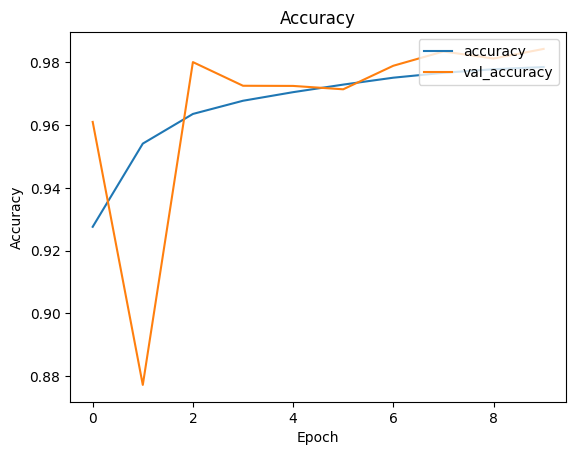

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

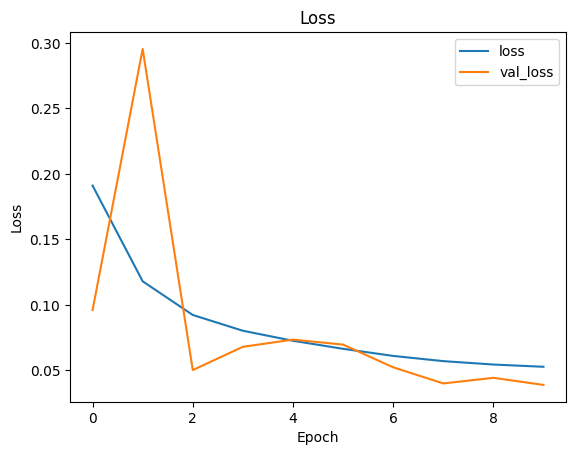

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

### Model Predictions Visualization

In [41]:
fn = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-22-23AMFC_4.jpg",
    out_fname = "dataset-segmentation/out/06-22-23AMFC_4.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

n = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-21-23PM-N_26.jpg",
    out_fname = "dataset-segmentation/out/06-21-23PM-N_26.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

p = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-23-23PMF-K_7.jpg",
    out_fname = "dataset-segmentation/out/06-23-23PMF-K_7.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)

k = model.predict_segmentation(
    inp="dataset-segmentation/test-images/06-26-23PM-K_22.jpg",
    out_fname = "dataset-segmentation/out/06-26-23PM-K_22.png", overlay_img = True, show_legends = True,
    class_names = ["background", "lettuce"]
)


1/1 [==============================] - 0s 49ms/step


#### Visualizations

**Resizing predicted masks**

In [45]:
fn = st.resize(fn, (3024, 3024))
n = st.resize(n, (3024, 3024))
p = st.resize(p, (3024,3024))
k = st.resize(k, (3024,3024))
preds = [n, fn, p, k]

**Loading files**

In [46]:
images = glob("dataset-segmentation/images/*.jpg")
masks = glob("dataset-segmentation/masks/*.png")
out = glob("dataset-segmentation/out/*.png")

images = [mpimg.imread(i) for i in images]
masks = [mpimg.imread(i) for i in masks]
out = [mpimg.imread(i) for i in out]

**Setting up the array**

In [47]:
arr = []
for i in range(4):
    arr.insert((i*4), images[i])
    arr.insert((i*4)+1, masks[i])
    arr.insert((i*4)+2, preds[i])
    arr.insert((i*4)+3, out[i])


**Plotting the results**

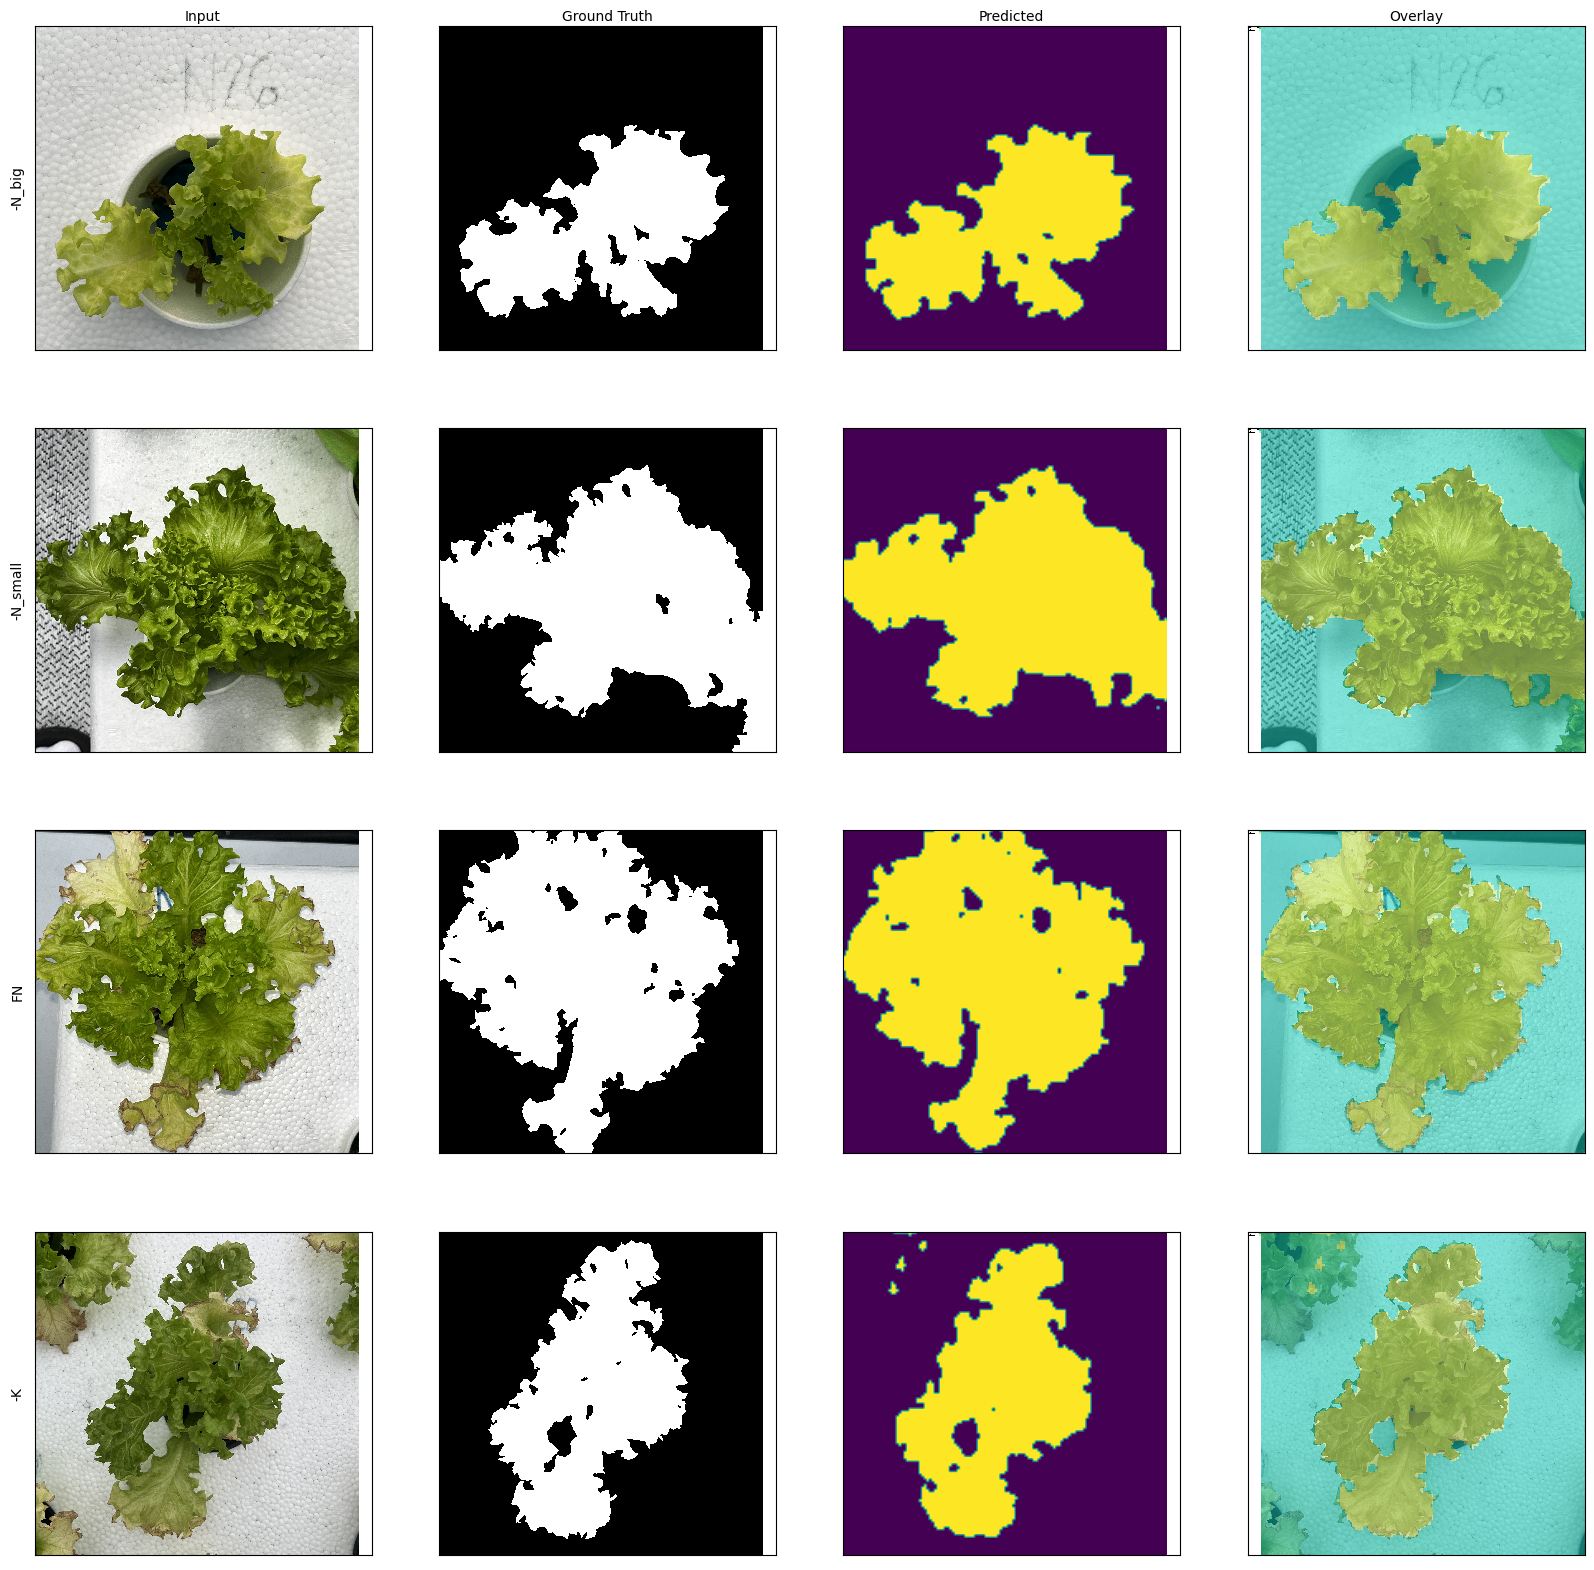

In [48]:
fig, axs = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize=(20, 20))
axs = axs.flatten()

y_labels=["-N_big", "-N_small", "FN", "-K"]
x_labels = ["Input", "Ground Truth", "Predicted", "Overlay"]

for i in range(len(arr)):
    axs[i].imshow(arr[i], interpolation='none')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

    if i%4 == 0:
        axs[i].set_ylabel(y_labels[i//4])

    if i < 4:
        axs[i].set_xlabel(x_labels[i])
        axs[i].xaxis.set_label_position('top')

### Model Evaluation

In [36]:
print(model.evaluate_segmentation( inp_images_dir="dataset-segmentation/test-resized/"  , annotations_dir="dataset-segmentation/test-annotations/" ) )


0it [00:00, ?it/s]

1/1 [==============================] - 0s 92ms/step


1it [00:00,  2.16it/s]

1/1 [==============================] - 0s 37ms/step


2it [00:00,  2.89it/s]

1/1 [==============================] - 0s 46ms/step


3it [00:00,  3.49it/s]

1/1 [==============================] - 0s 82ms/step


4it [00:01,  3.58it/s]

1/1 [==============================] - 0s 68ms/step


5it [00:01,  3.22it/s]

1/1 [==============================] - 0s 57ms/step


6it [00:01,  3.05it/s]

1/1 [==============================] - 0s 43ms/step


7it [00:02,  3.44it/s]

1/1 [==============================] - 0s 44ms/step


8it [00:02,  3.63it/s]

1/1 [==============================] - 0s 47ms/step


9it [00:02,  3.99it/s]

1/1 [==============================] - 0s 54ms/step


10it [00:02,  4.28it/s]

1/1 [==============================] - 0s 46ms/step


11it [00:02,  4.53it/s]

1/1 [==============================] - 0s 46ms/step


12it [00:03,  4.69it/s]

1/1 [==============================] - 0s 40ms/step


13it [00:03,  5.07it/s]

1/1 [==============================] - 0s 43ms/step


14it [00:03,  5.09it/s]

1/1 [==============================] - 0s 31ms/step


15it [00:03,  5.21it/s]

1/1 [==============================] - 0s 34ms/step


16it [00:03,  5.53it/s]

1/1 [==============================] - 0s 42ms/step


17it [00:04,  5.45it/s]

1/1 [==============================] - 0s 52ms/step


18it [00:04,  5.18it/s]

1/1 [==============================] - 0s 42ms/step


19it [00:04,  5.32it/s]

1/1 [==============================] - 0s 32ms/step


20it [00:04,  5.79it/s]

1/1 [==============================] - 0s 24ms/step


21it [00:04,  6.31it/s]

1/1 [==============================] - 0s 19ms/step


23it [00:04,  7.72it/s]

1/1 [==============================] - 0s 32ms/step


24it [00:05,  8.11it/s]

1/1 [==============================] - 0s 19ms/step


26it [00:05,  8.97it/s]

1/1 [==============================] - 0s 29ms/step


28it [00:05,  9.61it/s]

1/1 [==============================] - 0s 30ms/step


30it [00:05,  5.38it/s]

{'frequency_weighted_IU': 0.9441397522771822, 'mean_IU': 0.9439501408175934, 'class_wise_IU': array([0.94716563, 0.94073465])}


### Save Model

In [ ]:
model.save("vggseg.h5")
# model.save("vggseg")